# Customer Spending Prediction Using Linear Regression

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Get rid of scientific notation (e) while displaying numbers in a data frame
pd.options.display.float_format = '{:.2f}'.format

# Set plot style and palette
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Read in the Ecommerce Customers csv file as a DataFrame called customers.
customers = pd.read_csv("Ecommerce Customers")

# Check the first 5 rows
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.50,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.93,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.31,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33,12.80,37.54,4.45,599.41


In [2]:
# Describe the data
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


In [3]:
# Show info about customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


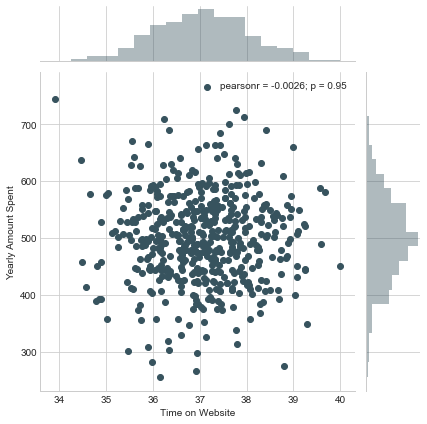

In [4]:
# Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

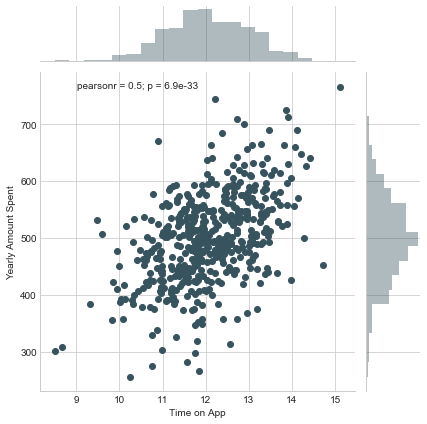

In [5]:
# Use seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns.
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

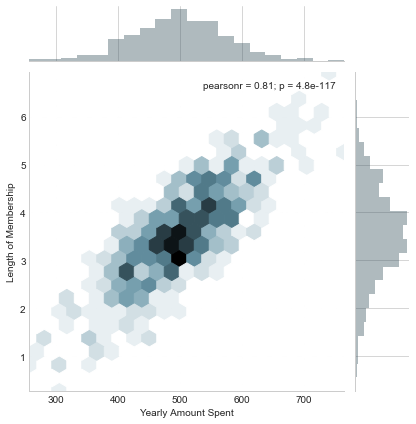

In [6]:
# Use jointplot to create a 2D hex bin plot comparing Yearly Amount Spent and Length of Membership.
sns.jointplot(x='Yearly Amount Spent',y='Length of Membership',kind='hex',data=customers)

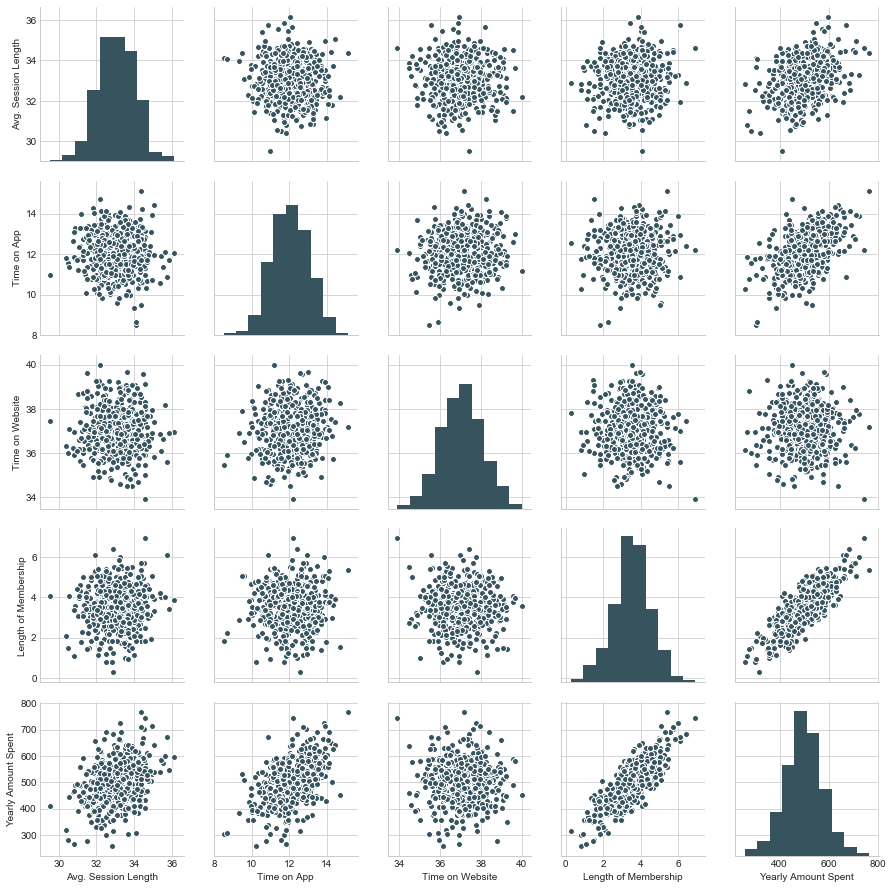

In [7]:
# Create a pairplot to explore the types of relationships across the entire data set
sns.pairplot(customers)

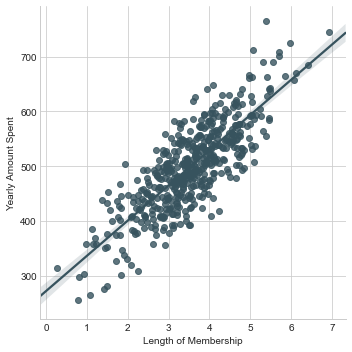

In [8]:
# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

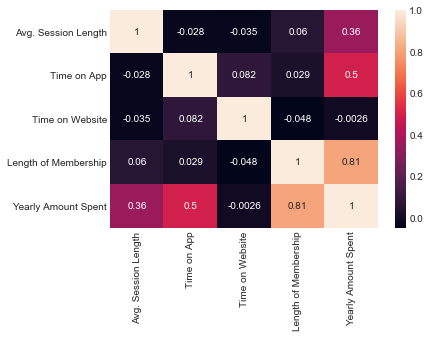

In [9]:
# Create the heatmap of the correlations
sns.heatmap(customers.corr(), annot = True)

In [10]:
# Display the column names
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
# Create independent varaibles
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

# Create dependent variable
y = customers['Yearly Amount Spent']

# Use model_selection.train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets. Set test_size=0.3 and random_state=101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create an instance of a LinearRegression() model named lm
lm = LinearRegression()

# Train/fit lm on the training data.
lm.fit(X_train,y_train)

# Use lm.predict() to predict off the X_test set of the data.
predictions = lm.predict(X_test)

In [12]:
# Compare Real values and predictions
pred = pd.DataFrame(predictions, columns = ['Predictions'])
real = pd.DataFrame(y_test).reset_index(drop = True)
view = pd.concat([real, pred], axis = 1)
view.head(10)

,Yearly Amount Spent,Predictions
0,452.32,456.44
1,401.03,402.72
2,410.07,409.25
3,599.41,591.43
4,586.16,590.01
5,535.48,548.82
6,588.71,577.60
7,712.40,715.44
8,462.90,473.79
9,532.72,545.92


Text(0,0.5,'Predicted Y')

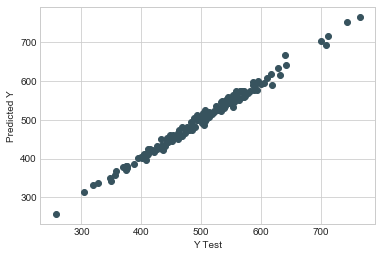

In [13]:
# Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

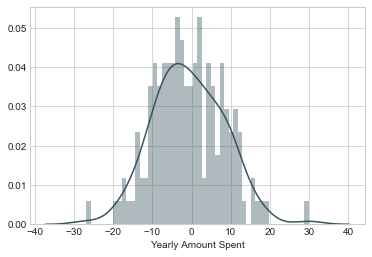

In [14]:
# Create a distplot of the errors with subtracting predictions from real amount spent
sns.distplot((y_test-predictions),bins=50);

In [15]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430837
MSE: 79.81305165097451
RMSE: 8.933815066978637


In [16]:
# Create a data frame that shows coefficients including intercept parameter
cdf = pd.DataFrame(data = [lm.coef_[0], lm.coef_[1], lm.coef_[2], lm.coef_[3], lm.intercept_], 
                   index = ['Avg. Session Length', 'Time on App', 'Time on Website', 
                        'Length of Membership', 'Intercept'], 
                   columns = ['Coeff'])

cdf

,Coeff
Avg. Session Length,25.98
Time on App,38.59
Time on Website,0.19
Length of Membership,61.28
Intercept,-1047.93





# Interpreting the coefficients:

- Holding all other features fixed, 1 unit increase in **Average session length of in-store style advice sessions** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, 1 unit increase in **Average time spent on App in minutes** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, 1 unit increase in **Average time spent on Website in minutes** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, 1 unit increase in **the Years the customer has been a member** is associated with an **increase of 61.27 total dollars spent**.

# Observations
There are two ways to increase customer spending: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. The answer can be dependent of the other factors going on at the company.